In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/2020_Recorded_Votes_Regular_Council.csv')
df = df.append(pd.read_csv('../Data/2020_Recorded_Votes_Special_Council.csv'))
df = df.append(pd.read_csv('../Data/2019_Recorded_Votes_Special_Council.csv'))
df = df.append(pd.read_csv('../Data/2019_Recorded_Votes_Regular_Council.csv'))

In [3]:
df.shape

(3577, 7)

In [4]:
df.head()

,ObjectId,MeetingType,MeetingDate,Voter,Resolution,Vote,Result
0,1,Regular Meeting of Council,1/27/2020,Marianne Meed Ward,Enact and pass the following by-laws which are...,Yes,CARRIED
1,2,Regular Meeting of Council,1/27/2020,Marianne Meed Ward,Approve the request by Coral Gable Custom Home...,Yes,CARRIED
2,3,Regular Meeting of Council,1/27/2020,Marianne Meed Ward,Deny the request to remove a public tree at 21...,Yes,CARRIED
3,4,Regular Meeting of Council,1/27/2020,Marianne Meed Ward,Approve the request by the homeowner at 297 Ke...,Yes,CARRIED
4,5,Regular Meeting of Council,1/27/2020,Marianne Meed Ward,"Approve the Urban Private Tree Bylaw 02-2020, ...",Yes,CARRIED


In [5]:
df.isna().sum()

ObjectId         0
MeetingType      0
MeetingDate      0
Voter            0
Resolution     301
Vote           246
Result          14
dtype: int64

In [6]:
df[df['Resolution'].isna()]

,ObjectId,MeetingType,MeetingDate,Voter,Resolution,Vote,Result
56,57,Regular Meeting of Council,2/24/2020,Marianne Meed Ward,NaN,Yes,CARRIED
57,58,Regular Meeting of Council,2/24/2020,Marianne Meed Ward,NaN,Yes,CARRIED
74,75,Regular Meeting of Council,2/24/2020,Kelvin Galbraith,NaN,Yes,CARRIED
75,76,Regular Meeting of Council,2/24/2020,Kelvin Galbraith,NaN,Yes,CARRIED
92,93,Regular Meeting of Council,2/24/2020,Lisa Kearns,NaN,Yes,CARRIED
...,...,...,...,...,...,...,...
1570,1571,Regular Meeting of Council,9/23/2019,Angelo Bentivegna,NaN,Yes,CARRIED
1610,1611,Regular Meeting of Council,12/16/2019,Paul Sharman,NaN,Yes,CARRIED
1614,1615,Regular Meeting of Council,12/16/2019,Paul Sharman,NaN,Yes,CARRIED
1654,1655,Regular Meeting of Council,12/16/2019,Angelo Bentivegna,NaN,No,CARRIED


In [7]:
df = df.dropna(axis=0)

In [8]:
df[df['Resolution'].apply(lambda x: type(x) == str and 'by-law' in x)][['MeetingDate','Resolution']]

,MeetingDate,Resolution
0,1/27/2020,Enact and pass the following by-laws which are...
7,1/27/2020,Amend procedure by-law update (CL-01-20) with ...
10,1/27/2020,Approve City of Burlington Procedure By-law 04...
14,1/27/2020,Enact and pass the following by-laws which are...
21,1/27/2020,Amend procedure by-law update (CL-01-20) with ...
...,...,...
1642,12/16/2019,Enact and pass the following by-laws which are...
1644,12/16/2019,Approve the recommendations contained in trans...
1657,12/16/2019,Approve the implementation of the city-wide pr...
1672,12/16/2019,"Endorse the open air burning permit areas, wit..."


In [9]:
df[df['Resolution'].apply(lambda x: type(x) == str and 'by-law' in x)][['MeetingDate','Resolution']]['Resolution']

0       Enact and pass the following by-laws which are...
7       Amend procedure by-law update (CL-01-20) with ...
10      Approve City of Burlington Procedure By-law 04...
14      Enact and pass the following by-laws which are...
21      Amend procedure by-law update (CL-01-20) with ...
                              ...                        
1642    Enact and pass the following by-laws which are...
1644    Approve the recommendations contained in trans...
1657    Approve the implementation of the city-wide pr...
1672    Endorse the open air burning permit areas, wit...
1674    Approve community benefits in relation to the ...
Name: Resolution, Length: 607, dtype: object

By-laws are in the format xx-YY for in the agenda, but on the site https://www.burlington.ca/en/Modules/Bylaws/Bylaw/Search you can only search by full year.

In [10]:
text = '<end>'.join(df['Resolution'].astype('str').values)
print(text[:1000])

Enact and pass the following by-laws which are now introduced, entitled and numbered as indicated below:<end>Approve the request by Coral Gable Custom Homes to remove one City-owned tree (8 cm Honey Locust) from the City's road allowance at 310 Appleby Line to allow driveway access as part of a development application as outlined in roads, parks and forestry department report RPF-01-20; and
Instruct Coral Gable Custom Homes to provide compensation for the tree removal by providing cash in lieu of replacement totaling $800.  The approved appraisal method is aggregate caliper; and
Direct that all associated costs with respect to the removal of the tree will be the responsibility of Coral Gable Custom Homes, and the contractor hired to removed the tree will be approved by the Manager of Urban Forestry of designate.<end>Deny the request to remove a public tree at 2123 Kevin Crescent as outlined in roads, parks and forestry department report RPF-03-20.<end>Approve the request by the homeo


### Replace frequent phrases

In [11]:
text.count('Enact and pass the following by-laws which are now introduced, entitled and numbered as indicated below:<end>')

152

Replace this text with a special marker

In [12]:
text = text.replace('Enact and pass the following by-laws which are now introduced, entitled and numbered as indicated below:<end>', '<by-law-intro><end>')
text.count('<by-law-intro>')

152

### Identify more Stop Words

In [13]:
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.lm import NgramCounter
import nltk

stop_words = nltk_stopwords.words('english')
filtered_text = [t for t in text.split() if t.lower() not in stop_words]
frequencies = nltk.FreqDist(filtered_text)

# text_unigram = ngrams(text.split(), 1)
# text_bigram = ngrams(text.split(), 2)
# ngram_counts = ngram_counter = NgramCounter([text_unigram] + [text_bigram])

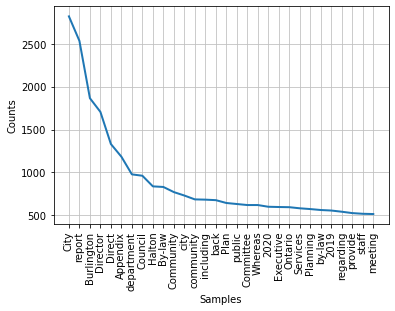

In [14]:
frequencies.plot(30)

A few words that could be added to the stop-word list are: whereas, report, including, accordance

In [15]:
stop_words = nltk_stopwords.words('english')
stop_words += ['whereas', 'report', 'including', 'accordance', 'meetings', 'council',
               'clerk', 'clerks', 'insert', 'delete', 'section', 'public session', 'moved', 'proposed',
               'committee', 'by-law','law', 'laws', 'receive', 'file', 'following', 'public', 'minutes', 'present', 'presentation', '<by-law-intro>',
               'vote', 'voted', 'amend', 'amended', 'consent', 'way', 'upon', 'items', 'item']
stop_words = list(set(stop_words))

## Modeling
### Vectorizing

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_df=0.75, token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b')
lda = LatentDirichletAllocation(n_components=30, learning_offset=20, max_iter=30, learning_method='online')

search_params = {'n_components':[25, 30, 40, 50], 'learning_decay':[0.5, 0.7, 0.8], 'max_iter':[10,20,30,40]}
grid_cv = GridSearchCV(lda, search_params, verbose=2, n_jobs=4)

In [17]:
df['Text'] = df['Resolution'].apply(lambda x: x.replace('Enact and pass the following by-laws which are now introduced, entitled and numbered as indicated below:', '<by-law-intro>'))
tfidf.fit(df['Text'])
vectorized = tfidf.transform(df['Text'])

D:\Users\nickm\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['intro', 'session'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [18]:
vectorized[:10]

<10x34394 sparse matrix of type '<class 'numpy.float64'>'
	with 1017 stored elements in Compressed Sparse Row format>

In [19]:
grid_cv.fit(vectorized)
model = grid_cv.best_estimator_
print("Best Model Params: ", grid_cv.best_params_)
print("Best Log-likelihood Score: ", grid_cv.best_score_)
model.get_params()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 43.3min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed: 73.4min finished


Best Model Params:  {'learning_decay': 0.8, 'max_iter': 10, 'n_components': 25}
Best Log-likelihood Score:  -154441.87854770818


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.8,
 'learning_method': 'online',
 'learning_offset': 20,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 25,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [20]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(len(model.components_)//5, 5, figsize=(60, 40), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)


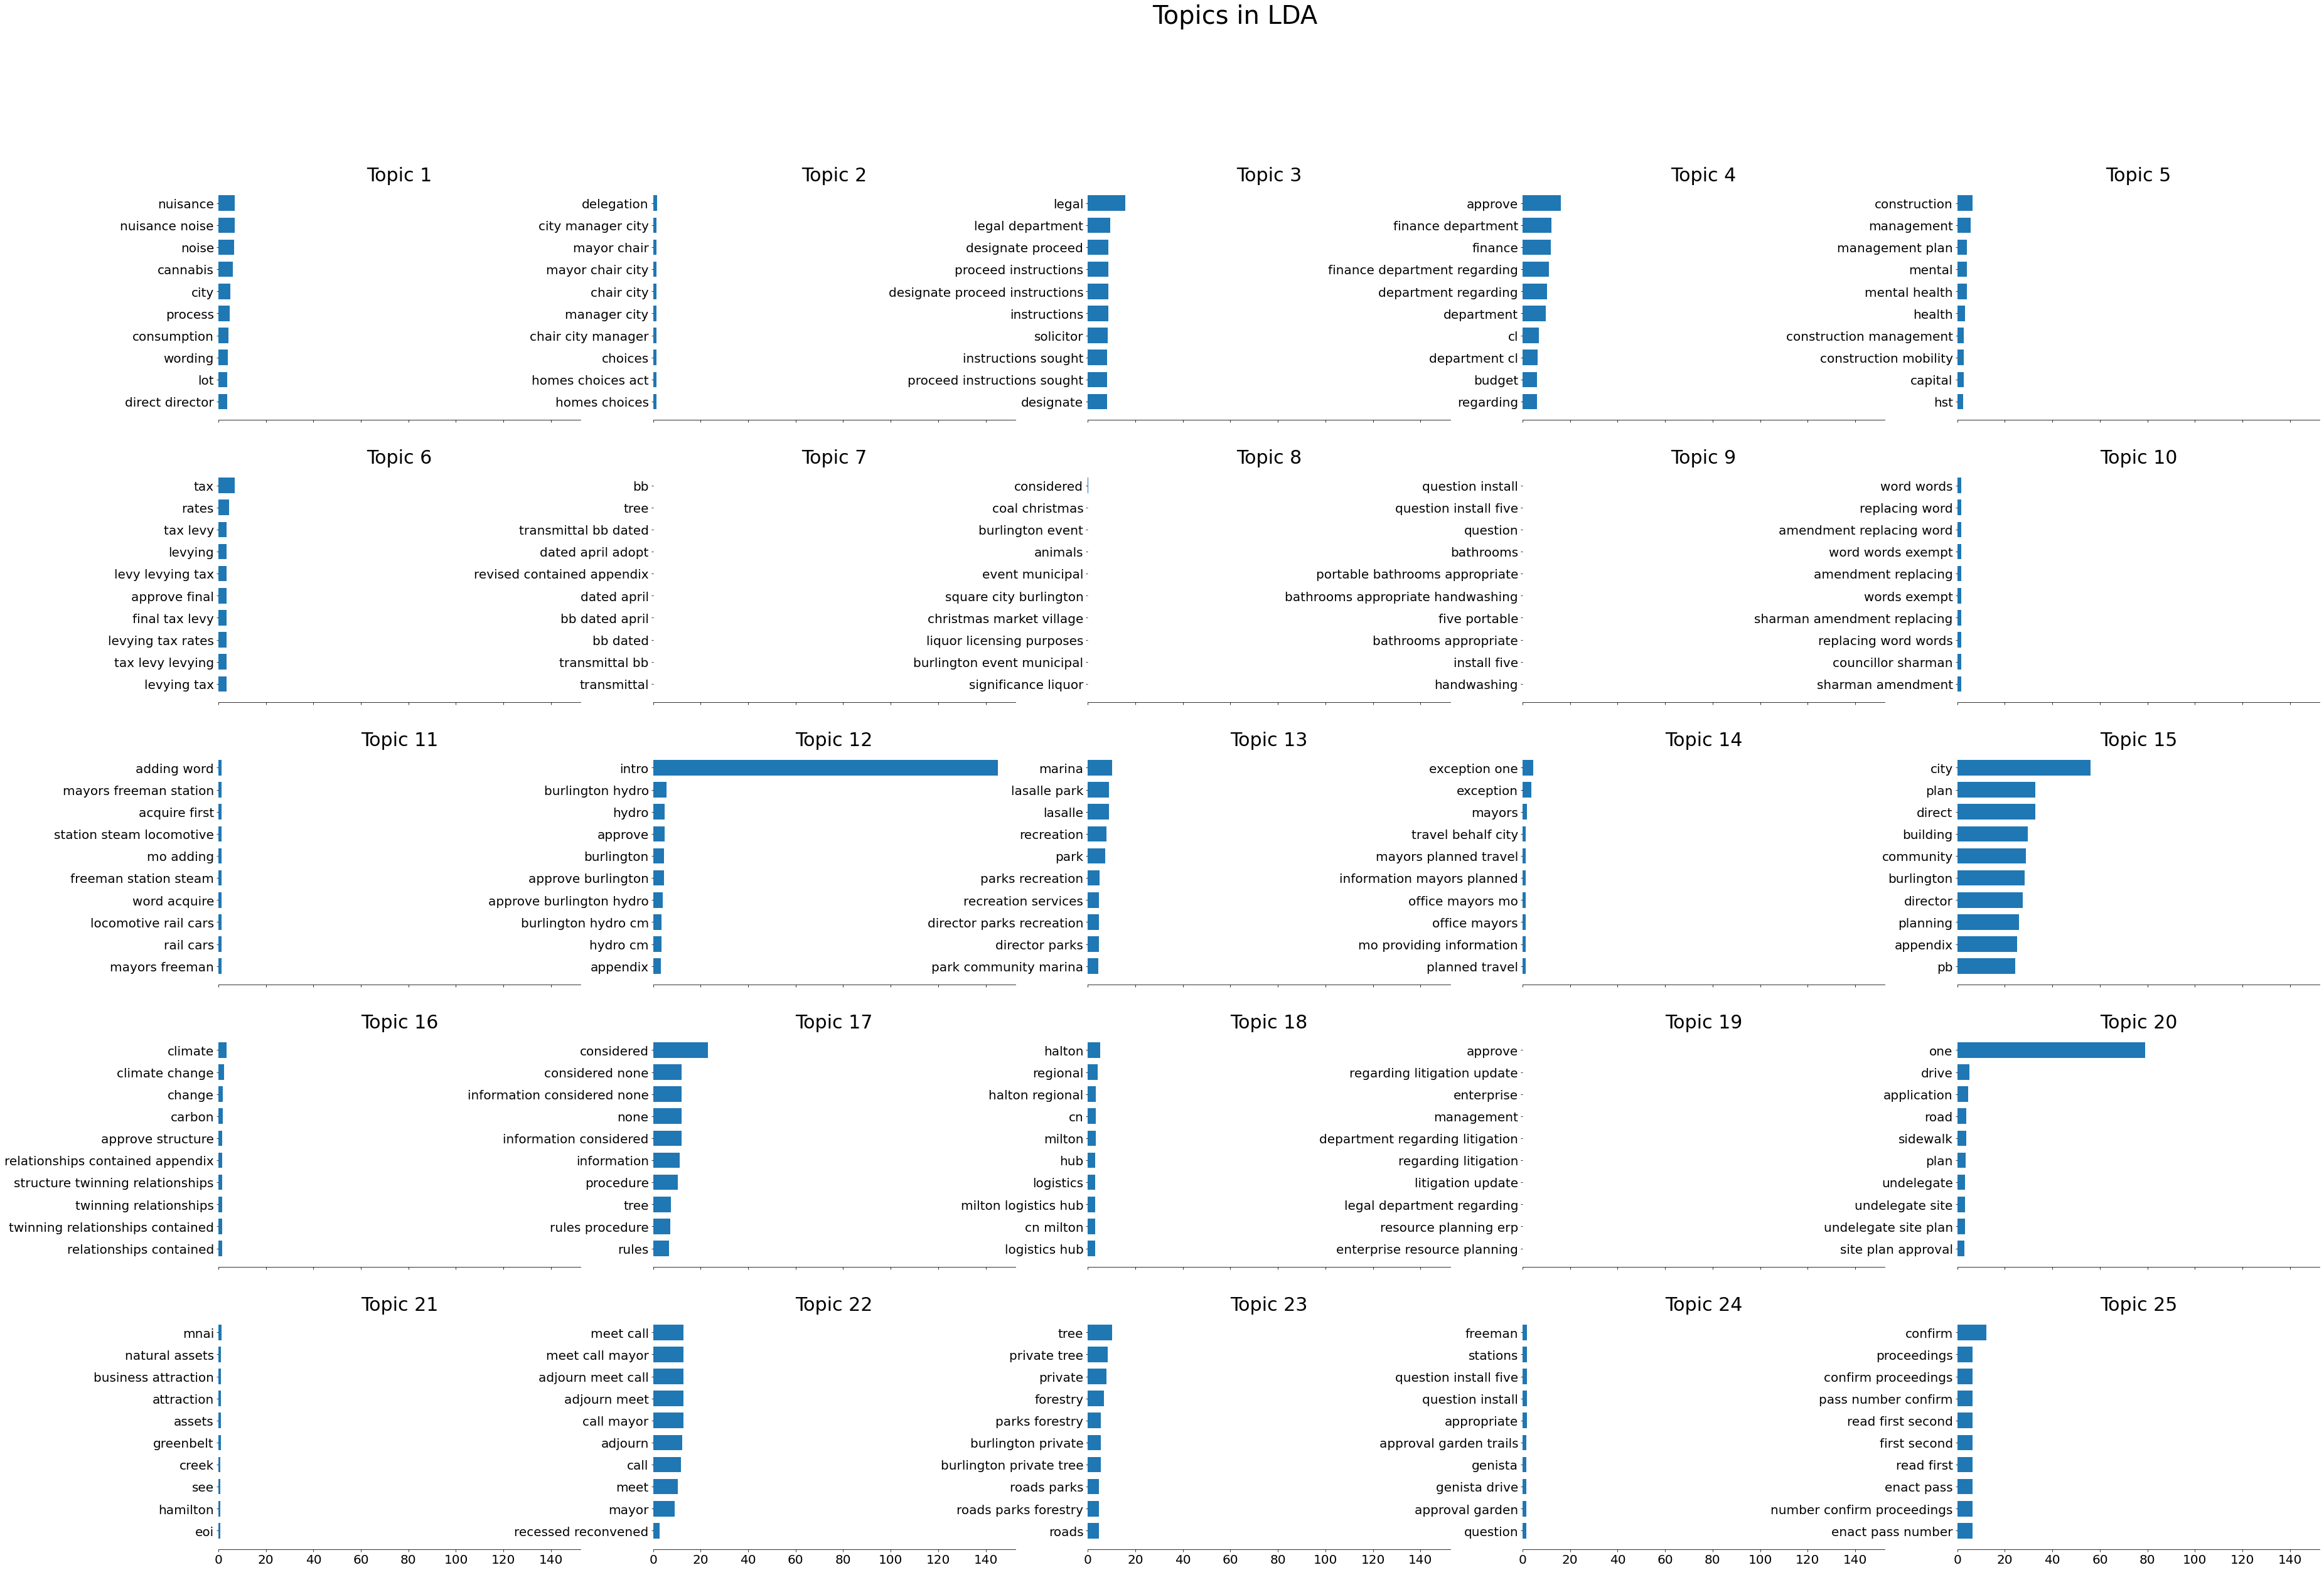

In [21]:
plot_top_words(model, tfidf.get_feature_names(), 10, 'Topics in LDA')

In [22]:
def get_topic(txt, n_top_words=15):
    vec = tfidf.transform([txt])
    topic = model.transform(vec)
    feat_names = tfidf.get_feature_names()
    topic = topic[0]
#     print(len(topic))
    print(topic)
    return txt, np.argmax(topic)+1   
get_topic(df['Text'].iloc[846])

[0.00361425 0.00361425 0.00361425 0.00361425 0.00361425 0.00361425
 0.00361425 0.00361425 0.00361425 0.00361425 0.00361425 0.00361425
 0.00361425 0.00361425 0.9132579  0.00361425 0.00361425 0.00361425
 0.00361425 0.00361425 0.00361425 0.00361425 0.00361425 0.00361425
 0.00361425]


("Direct the Director of Community Planning to submit the appendices to Community Planning Department report PL-28-20 as the City of Burlington Submission on the Region of Haltons Official Plan Discussion Papers by the comment submission deadline of September 28, 2020; and\r\nDirect the Director of Community Planning to provide any additional comments to the Region, if any, upon Council approval on September 28, 2020; and\r\nDirect the Director of Community Planning to include the Burlington Agriculture & Rural Affairs Advisory Committee's comments, as outlined in Appendix C to community planning report PL-28-20, with the City of Burlington's Submission on the Region of Halton's Official Plan Discussion Papers.",
 15)